## Generate Toy dataset

In [11]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)

# last rand is disturbance(noise)
y = 5 + 2*x + np.random.rand(100, 1)

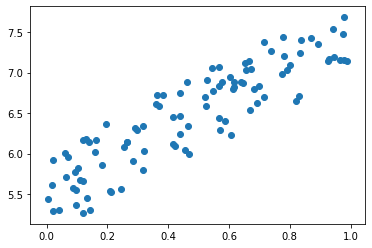

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x, y);

## Implement `Linear Regression`

In [13]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

In [14]:
def linear_regression(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [17]:
lr = 0.1
iters = 100

for i in range(100):
    y_pred = linear_regression(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    
    print(W, b, loss)

Variable([[1.12672345]]) Variable([2.26959351]) Variable(23.97380754378544)
Variable([[1.48734571]]) Variable([3.00386712]) Variable(13.609686745040522)
Variable([[1.75641886]]) Variable([3.557186]) Variable(7.747049961219976)
Variable([[1.95666851]]) Variable([3.97439789]) Variable(4.43057410592155)
Variable([[2.10518573]]) Variable([4.28923203]) Variable(2.5542803813535926)
Variable([[2.21482401]]) Variable([4.52705574]) Variable(1.4925998690471942)
Variable([[2.29524981]]) Variable([4.70694745]) Variable(0.8916952181756932)
Variable([[2.35373273]]) Variable([4.84325585]) Variable(0.5514270962227453)
Variable([[2.39573972]]) Variable([4.9467725]) Variable(0.35859153083192785)
Variable([[2.425382]]) Variable([5.02561369]) Variable(0.2491573197756112)
Variable([[2.44575118]]) Variable([5.08588371]) Variable(0.18690658765397886)
Variable([[2.45917205]]) Variable([5.13217364]) Variable(0.15135336296314875)
Variable([[2.4673927]]) Variable([5.16793652]) Variable(0.13091003006317078)
Varia

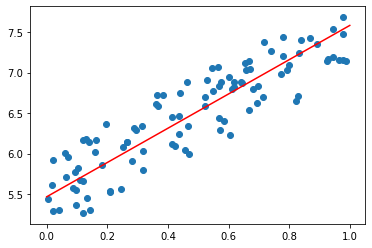

In [35]:
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)

# last rand is disturbance(noise)
y = 5 + 2*x + np.random.rand(100, 1)

plt.scatter(x, y)

x0, y0 = 0, linear_regression(np.array(0)).data[0][0]
x1, y1 = 1, linear_regression(np.array(1)).data[0][0]

plt.plot((x0, x1), (y0, y1), c='r');

###  We can see it's well fitted :)!

## Implement `mean_squared_error` function

We used above like following...

In [48]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [49]:
# len doesn't work at scalar
len(np.array(1.))

TypeError: len() of unsized object

In [50]:
x0 = Variable(np.array([7.0]))
x1 = Variable(np.array([5.0]))

y = mean_squared_error(x0, x1)
y.backward()

print(y)
print(x0.grad, x1.grad)

Variable(4.0)
Variable([4.]) Variable([-4.])


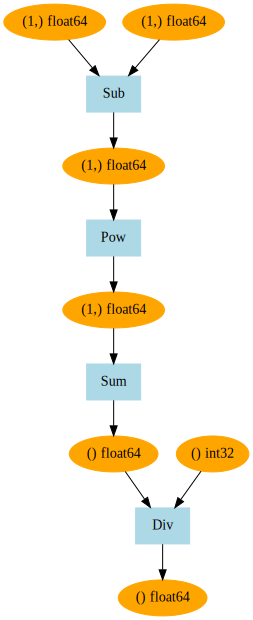

In [51]:
from dezero.utils import visualize_graph

visualize_graph(y)

**We can see this makes unnecessary Variables while calculating `mean squared error` . Let's make this as a `function`**

- forward
### $L = \frac{1}{N}\sum\limits^{N}_{i=1}(f(x_{i}) - y_{i})^{2}$
- backward
### $\frac{\partial{L}}{\partial{y}} = \frac{2}{N}\sum\limits^{N}_{i=1}(f(x_{i}) - y_{i})$
### $\frac{\partial{L}}{\partial{y_i}} = -\frac{2}{N}\sum\limits^{N}_{i=1}(f(x_{i}) - y_{i})$

In [7]:
from dezero import Function

class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff ** 2).sum() / len(diff)
        return y
    
    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2. / len(diff))
        gx1 = -gx0
        return gx0, gx1
    
def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0, x1)


In [1]:
from dezero import Variable
from dezero.functions import mean_squared_error

x0 = Variable(np.array([7.0]))
x1 = Variable(np.array([5.0]))

y = mean_squared_error(x0, x1)
y.backward()

print(y)
print(x0.grad, x1.grad)

Variable(4.0)
Variable([4.]) Variable([-4.])


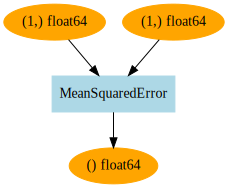

In [2]:
from dezero.utils import visualize_graph

visualize_graph(y)

### We can see the computational graph got a lot simple :)! We use less memory!